# Cloud Data Analysis from CROCUS nodes

This Jupyter Notebook demonstrates how to query and visualize cloud data using the Sage data client and pandas library. The notebook includes plotting cloud cover and cloud motion vector direction, filtering data based on rank of the cloud elements.

In [1]:
import sage_data_client
import pandas as pd

### Get data from beehive using Sage_data_client

In [14]:
dfcc = sage_data_client.query(
    start="2025-01-05T20:00:00Z",
    end="2025-01-05T21:00:00.000Z", 
    filter={
        "plugin": "registry.sagecontinuum.org/seonghapark/cloud-cover:0.1.3.*",
        "vsn": "W08B|W08D"
    }
)


In [18]:
dfcc=dfcc[dfcc['name']=="env.coverage.cloud"]
dfcc.head()

,timestamp,name,value,meta.host,meta.job,meta.node,meta.plugin,meta.task,meta.vsn,meta.zone
0,2025-01-05 20:02:17.006296064+00:00,env.coverage.cloud,1.0,000048b02d3ae277.ws-nxcore,cloud-cover-crocus-2214,000048b02d3ae277,registry.sagecontinuum.org/seonghapark/cloud-c...,cloud-cover-crocus,W08D,core
1,2025-01-05 20:05:07.394348544+00:00,env.coverage.cloud,1.0,000048b02d3ae277.ws-nxcore,cloud-cover-crocus-2214,000048b02d3ae277,registry.sagecontinuum.org/seonghapark/cloud-c...,cloud-cover-crocus,W08D,core
2,2025-01-05 20:07:57.085552640+00:00,env.coverage.cloud,1.0,000048b02d3ae277.ws-nxcore,cloud-cover-crocus-2214,000048b02d3ae277,registry.sagecontinuum.org/seonghapark/cloud-c...,cloud-cover-crocus,W08D,core
3,2025-01-05 20:10:47.651187456+00:00,env.coverage.cloud,1.0,000048b02d3ae277.ws-nxcore,cloud-cover-crocus-2214,000048b02d3ae277,registry.sagecontinuum.org/seonghapark/cloud-c...,cloud-cover-crocus,W08D,core
4,2025-01-05 20:13:36.652191744+00:00,env.coverage.cloud,1.0,000048b02d3ae277.ws-nxcore,cloud-cover-crocus-2214,000048b02d3ae277,registry.sagecontinuum.org/seonghapark/cloud-c...,cloud-cover-crocus,W08D,core


#### Plot Cloud cover

meta.vsn
W08B    Axes(0.125,0.2;0.775x0.68)
W08D    Axes(0.125,0.2;0.775x0.68)
dtype: object

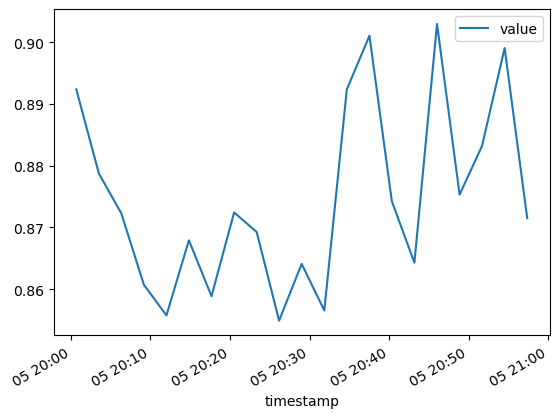

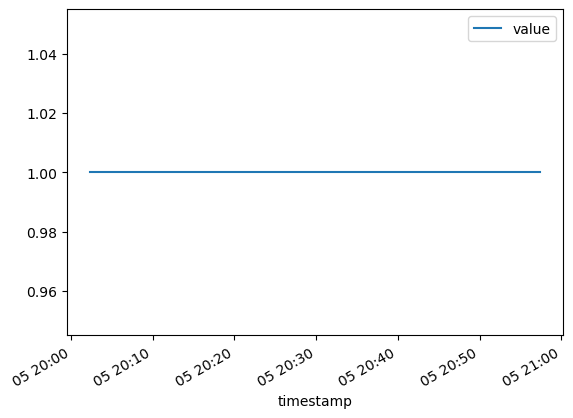

In [19]:
dfcc.groupby('meta.vsn').plot(x='timestamp', y='value')

#### Cloud Motion

In [20]:
import sage_data_client

df = sage_data_client.query(
    start="2025-01-01T06:00:00Z",
    end="2025-01-01T10:00:00.000Z", 
    filter={
        "plugin": "registry.sagecontinuum.org/bhupendraraut/cloud-motion:1.24.11.8a.*",
        "vsn": "W08B"
    }
)
df.head()

,timestamp,name,value,meta.channel,meta.host,meta.image_frac,meta.input,meta.job,meta.node,meta.nsegments_asked,meta.nsegments_found,meta.plugin,meta.quality,meta.seg_id,meta.seg_rank,meta.seg_size,meta.task,meta.vsn,meta.zone
0,2025-01-01 07:49:56.421996959+00:00,cmv.mean.dir.degn,160,0,0000dca632ed7151.ws-rpi,0.9,top_camera,cloud-motion-v1-368,000048b02d3ae2f5,100,65,registry.sagecontinuum.org/bhupendraraut/cloud...,2,1,1,382266,cloud-motion-v1,W08B,shield
1,2025-01-01 07:49:56.421996959+00:00,cmv.mean.dir.degn,189,0,0000dca632ed7151.ws-rpi,0.9,top_camera,cloud-motion-v1-368,000048b02d3ae2f5,100,65,registry.sagecontinuum.org/bhupendraraut/cloud...,2,18,6,67587,cloud-motion-v1,W08B,shield
2,2025-01-01 07:49:56.421996959+00:00,cmv.mean.dir.degn,247,0,0000dca632ed7151.ws-rpi,0.9,top_camera,cloud-motion-v1-368,000048b02d3ae2f5,100,65,registry.sagecontinuum.org/bhupendraraut/cloud...,2,23,8,53762,cloud-motion-v1,W08B,shield
3,2025-01-01 07:49:56.421996959+00:00,cmv.mean.dir.degn,164,0,0000dca632ed7151.ws-rpi,0.9,top_camera,cloud-motion-v1-368,000048b02d3ae2f5,100,65,registry.sagecontinuum.org/bhupendraraut/cloud...,2,24,7,62273,cloud-motion-v1,W08B,shield
4,2025-01-01 07:49:56.421996959+00:00,cmv.mean.dir.degn,205,0,0000dca632ed7151.ws-rpi,0.9,top_camera,cloud-motion-v1-368,000048b02d3ae2f5,100,65,registry.sagecontinuum.org/bhupendraraut/cloud...,2,3,2,178222,cloud-motion-v1,W08B,shield


In [23]:
df['name'].unique()

array(['cmv.mean.dir.degn', 'cmv.mean.mag.pxpm', 'cmv.median.dir.degn',
       'cmv.median.mag.pxpm', 'cmv.motion.detected', 'cmv.thresh.otsu'],
      dtype=object)

The cloud motion data is clustered into homogeneous motion regions and ranked based on their coverage. We will plot the top two ranks for a specific cloudy period. This visualizes how different cloud regions may be moving in different directions.

In [25]:
# Filter for name only
filtered_df = df[df['name'] == 'cmv.mean.dir.degn'].copy()
filtered_df[filtered_df['meta.seg_rank'] == "1"].head()

,timestamp,name,value,meta.channel,meta.host,meta.image_frac,meta.input,meta.job,meta.node,meta.nsegments_asked,meta.nsegments_found,meta.plugin,meta.quality,meta.seg_id,meta.seg_rank,meta.seg_size,meta.task,meta.vsn,meta.zone
0,2025-01-01 07:49:56.421996959+00:00,cmv.mean.dir.degn,160,0,0000dca632ed7151.ws-rpi,0.9,top_camera,cloud-motion-v1-368,000048b02d3ae2f5,100,65,registry.sagecontinuum.org/bhupendraraut/cloud...,2,1,1,382266,cloud-motion-v1,W08B,shield
12,2025-01-01 09:10:30.207055169+00:00,cmv.mean.dir.degn,181,0,0000dca632ed7151.ws-rpi,0.9,top_camera,cloud-motion-v1-368,000048b02d3ae2f5,100,69,registry.sagecontinuum.org/bhupendraraut/cloud...,2,3,1,182482,cloud-motion-v1,W08B,shield
18,2025-01-01 06:52:02.490018063+00:00,cmv.mean.dir.degn,182,0,0000dca632ed7151.ws-rpi,0.9,top_camera,cloud-motion-v1-368,000048b02d3ae2f5,100,71,registry.sagecontinuum.org/bhupendraraut/cloud...,2,1,1,314992,cloud-motion-v1,W08B,shield
19,2025-01-01 06:37:46.677039992+00:00,cmv.mean.dir.degn,188,0,0000dca632ed7151.ws-rpi,0.9,top_camera,cloud-motion-v1-368,000048b02d3ae2f5,100,71,registry.sagecontinuum.org/bhupendraraut/cloud...,2,1,1,350635,cloud-motion-v1,W08B,shield
34,2025-01-01 07:52:27.830451348+00:00,cmv.mean.dir.degn,203,0,0000dca632ed7151.ws-rpi,0.9,top_camera,cloud-motion-v1-368,000048b02d3ae2f5,100,71,registry.sagecontinuum.org/bhupendraraut/cloud...,2,4,1,174118,cloud-motion-v1,W08B,shield


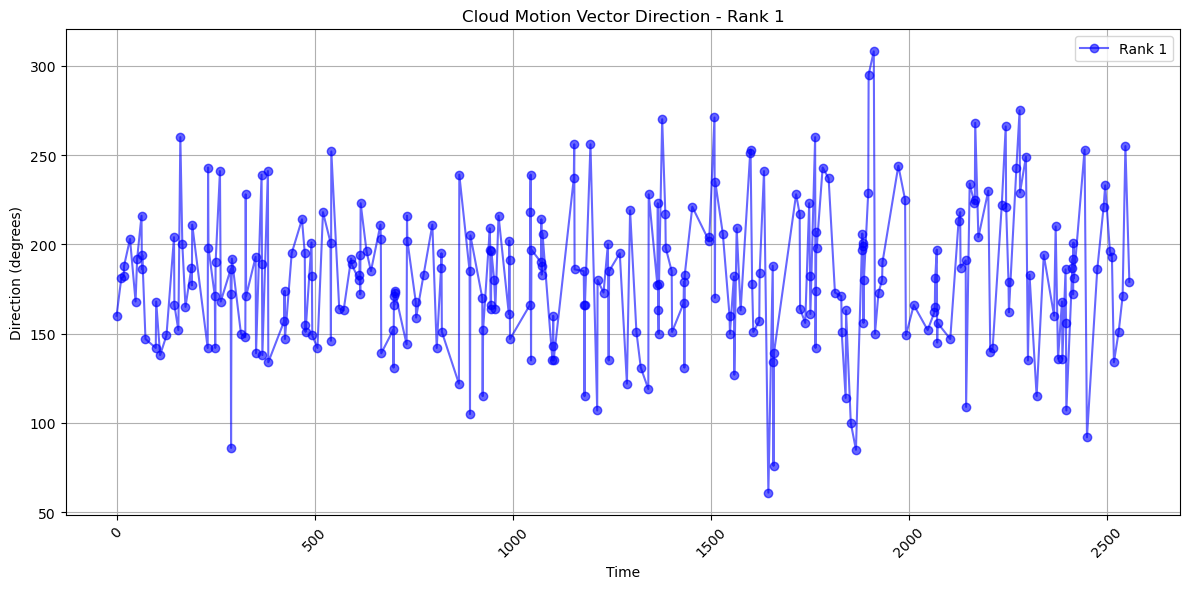

In [27]:
import matplotlib.pyplot as plt

# Create plot for rank 1 only
plt.figure(figsize=(12, 6))
rank_data = filtered_df[filtered_df['meta.seg_rank'] == "1"]
rank_data['value'].plot(style='o-', alpha=0.6, label='Rank 1', color='blue')

plt.ylabel('Direction (degrees)')
plt.xlabel('Time')
plt.title('Cloud Motion Vector Direction - Rank 1')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Cloud direction is too noisy fluctuating between 150 to 250 degrees for most of the time. So we will plot smoothed line.

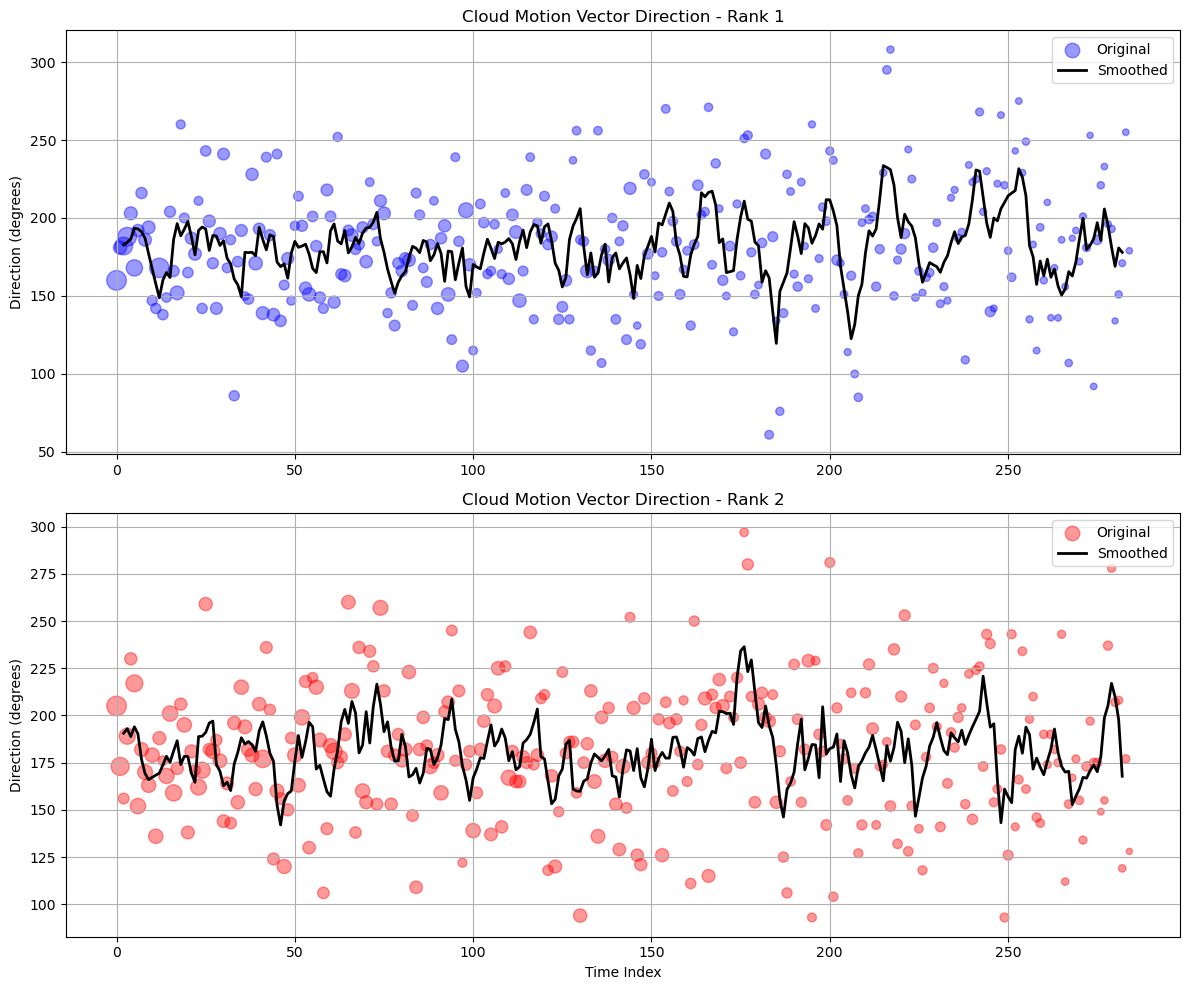

In [28]:
# Filter and prepare data
filtered_df = df[df['name'] == 'cmv.mean.dir.degn'].copy()
filtered_df['meta.seg_size'] = filtered_df['meta.seg_size'].astype(float)

# Create two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Process and plot for each rank
for rank, ax, color in zip(["1", "2"], [ax1, ax2], ['blue', 'red']):
    rank_data = filtered_df[filtered_df['meta.seg_rank'] == rank]
    
    # Normalize sizes for bubbles (between 20 and 200)
    sizes = ((rank_data['meta.seg_size'] - rank_data['meta.seg_size'].min()) / 
             (rank_data['meta.seg_size'].max() - rank_data['meta.seg_size'].min()) * 180 + 20)
    
    # Smooth the data
    smoothed = rank_data['value'].rolling(window=5, center=True).mean()
    
    # Plot original data as bubbles
    ax.scatter(range(len(rank_data)), rank_data['value'], 
              s=sizes, alpha=0.4, color=color, label='Original')
    
    # Plot smoothed line
    ax.plot(range(len(rank_data)), smoothed, 
           color='black', linewidth=2, label='Smoothed')
    
    ax.set_ylabel('Direction (degrees)')
    ax.set_title(f'Cloud Motion Vector Direction - Rank {rank}')
    ax.grid(True)
    ax.legend()

plt.xlabel('Time Index')
plt.tight_layout()
plt.show()

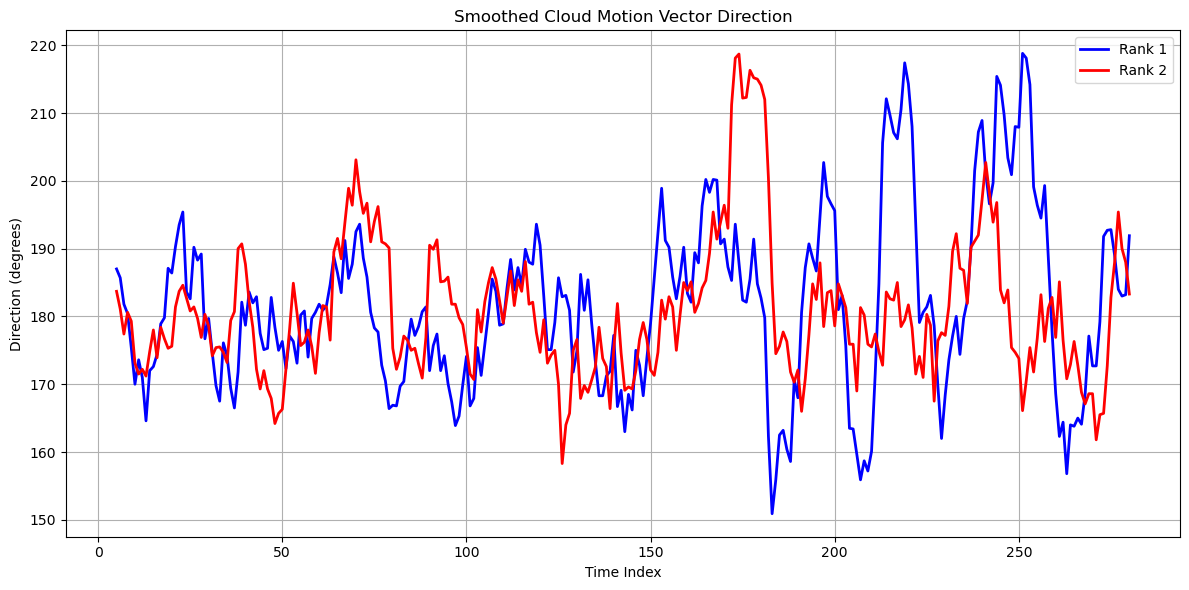

In [71]:
# Filter and prepare data
filtered_df = df[df['name'] == 'cmv.mean.dir.degn'].copy()
filtered_df['meta.seg_size'] = filtered_df['meta.seg_size'].astype(float)

# Create single plot
plt.figure(figsize=(12, 6))

# Process and plot for each rank
for rank, color in zip(["1", "2"], ['blue', 'red']):
    rank_data = filtered_df[filtered_df['meta.seg_rank'] == rank]
    
    # Smooth the data
    smoothed = rank_data['value'].rolling(window=10, center=True).mean()
    
    # Plot smoothed line
    plt.plot(range(len(rank_data)), smoothed, 
            color=color, linewidth=2, label=f'Rank {rank}')

plt.ylabel('Direction (degrees)')
plt.xlabel('Time Index')
plt.title('Smoothed Cloud Motion Vector Direction')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

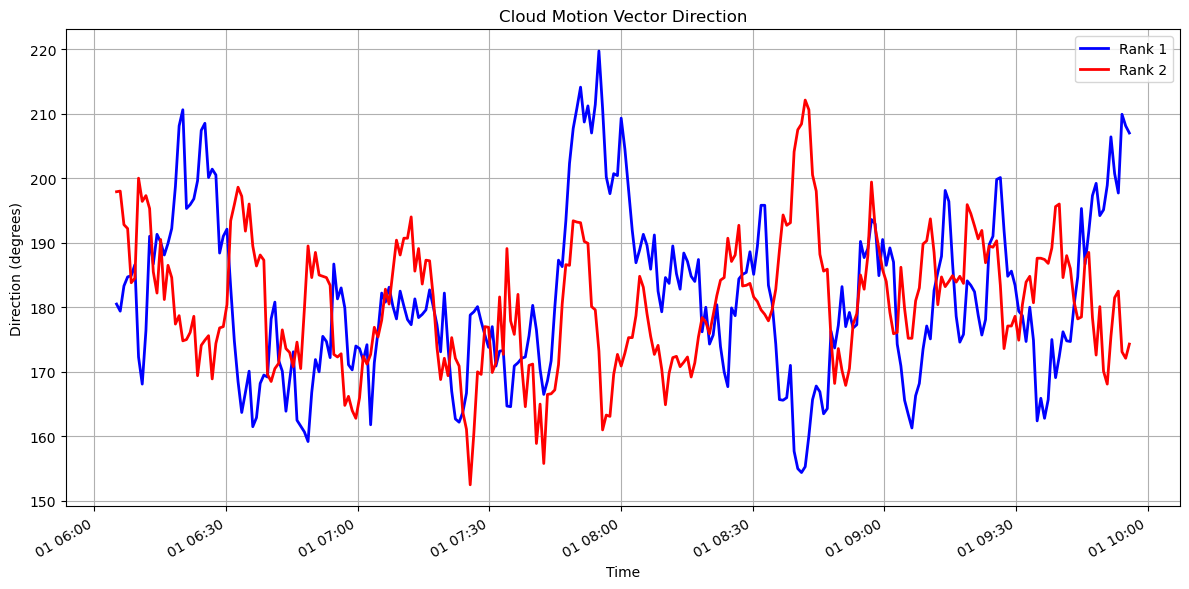

In [74]:
# Filter and prepare data
filtered_df = df[df['name'] == 'cmv.mean.dir.degn'].copy()
filtered_df['meta.seg_size'] = filtered_df['meta.seg_size'].astype(float)
filtered_df['timestamp'] = pd.to_datetime(filtered_df['timestamp'])
filtered_df = filtered_df.sort_values('timestamp')

# Create single plot
plt.figure(figsize=(12, 6))

# Process and plot for each rank
for rank, color in zip(["1", "2"], ['blue', 'red']):
    rank_data = filtered_df[filtered_df['meta.seg_rank'] == rank]
    
    # Smooth the data
    smoothed = rank_data.set_index('timestamp')['value'].rolling(window=10, center=True).mean()
    
    # Plot smoothed line
    plt.plot(smoothed.index, smoothed.values, 
            color=color, linewidth=2, label=f'Rank {rank}')

plt.ylabel('Direction (degrees)')
plt.xlabel('Time')
plt.title('Cloud Motion Vector Direction')
plt.grid(True)
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate and align the tick labels
plt.tight_layout()
plt.show()

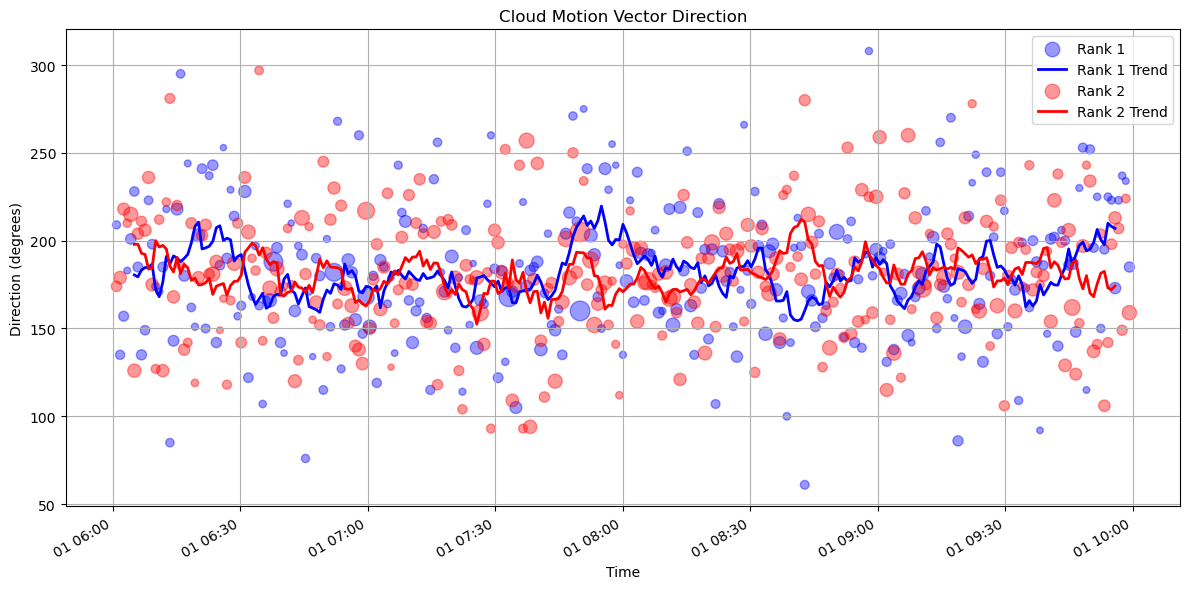

In [75]:
# Filter and prepare data
filtered_df = df[df['name'] == 'cmv.mean.dir.degn'].copy()
filtered_df['meta.seg_size'] = filtered_df['meta.seg_size'].astype(float)
filtered_df['timestamp'] = pd.to_datetime(filtered_df['timestamp'])
filtered_df = filtered_df.sort_values('timestamp')

plt.figure(figsize=(12, 6))

# Process and plot for each rank
for rank, color in zip(["1", "2"], ['blue', 'red']):
    rank_data = filtered_df[filtered_df['meta.seg_rank'] == rank]
    
    # Normalize sizes for bubbles (between 20 and 200)
    sizes = ((rank_data['meta.seg_size'] - rank_data['meta.seg_size'].min()) / 
             (rank_data['meta.seg_size'].max() - rank_data['meta.seg_size'].min()) * 180 + 20)
    
    # Smooth the data
    smoothed = rank_data.set_index('timestamp')['value'].rolling(window=10, center=True).mean()
    
    # Plot bubbles and smoothed line
    plt.scatter(rank_data['timestamp'], rank_data['value'], 
               s=sizes, alpha=0.4, color=color, label=f'Rank {rank}')
    plt.plot(smoothed.index, smoothed.values, 
            color=color, linewidth=2, label=f'Rank {rank} Trend')

plt.ylabel('Direction (degrees)')
plt.xlabel('Time')
plt.title('Cloud Motion Vector Direction')
plt.grid(True)
plt.legend()
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()